# Statistical Analysis of Bay Area Bike Share Data - Station Status

# Station Balance at Top Commuter Stations
<ul>Top Commuter Stations
	<li><b>Station 70 :</b> San Francisco Caltrain (Townsend at 4th)</li>
	<li><b>Station 69 :</b> San Francisco Caltrain 2 (330 Townsend)</li>
	<li><b>Station 50 :</b> Harry Bridges Plaza (Ferry Building)</li>
	<li><b>Station 55 :</b> Temporary Transbay Terminal (Howard at Beale)</li>
	<li><b>Station 74 :</b> Steuart at Market</li>
</ul>

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
# from scipy import stats
# import scipy
import math
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime

import seaborn as sns
# sns.set()
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

font = {'size'   : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

day_labels = ['MON','TUE','WED','THU','FRI','SAT','SUN']
day_labels_full = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']
month_labels = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
month_labels_full = ['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']

sub_color = 'b'
sub_color_alt = 'm'
cust_color='r'
cust_color_alt='y'

commuter_color='g'
commuter_color_alt='#1daf1d'

commuter_am = '#ea54d9'     #OrRd
commuter_am_alt = '#9b8460' #OrRd_r

commuter_pm = '#b97ccc'     #PuRd
commuter_pm_alt = '#f4ad3a' #PuRd_r

FIG_SIZE = (15,6)
FIG_SIZE_SHORT = (15,3)
GRID_DIMS = 15

DO_WRITE_CHARTS = True

# Load Morning and Evening Commuter Trips Data

In [3]:
super_stations = [69, 70]

In [4]:
print('[%s] Loading Morning Commute Trips Data...' % datetime.datetime.now().time())

morning_commutes = pd.DataFrame()
trip_data_file = '../clean_data/bayareabikeshare/trip_data_morning_commutes.csv'

# Chunk Settings
chunks = []
chunk_counter = 1
chunksize = 10000
num_chunks = math.ceil(sum(1 for row in open(trip_data_file, 'r'))/chunksize)

# import file in chunks
for chunk in pd.read_csv(trip_data_file, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['start_date', 'end_date', 'forecast_time']):
        
    # append chunk to chunks list
    chunks.append(chunk)

    if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
        print('\t\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
    chunk_counter += 1

morning_commutes = pd.concat(chunks)
morning_commutes.reset_index(inplace=True, drop=True)
print('[%s] Complete!' % datetime.datetime.now().time())

[19:20:38.225174] Loading Morning Commute Trips Data...
		[19:20:38.796755] finished chunk 1 of 26
		[19:20:39.217235] finished chunk 3 of 26
		[19:20:39.769171] finished chunk 6 of 26
		[19:20:40.385607] finished chunk 9 of 26
		[19:20:40.935777] finished chunk 12 of 26
		[19:20:41.968227] finished chunk 15 of 26
		[19:20:42.691492] finished chunk 18 of 26
		[19:20:43.287157] finished chunk 21 of 26
		[19:20:43.901593] finished chunk 24 of 26
		[19:20:44.168848] finished chunk 26 of 26
[19:20:44.424711] Complete!


In [5]:
print('[%s] Loading Evening Commute Trips Data...' % datetime.datetime.now().time())

evening_commutes = pd.DataFrame()
trip_data_file = '../clean_data/bayareabikeshare/trip_data_evening_commutes.csv'

# Chunk Settings
chunks = []
chunk_counter = 1
chunksize = 10000
num_chunks = math.ceil(sum(1 for row in open(trip_data_file, 'r'))/chunksize)

# import file in chunks
for chunk in pd.read_csv(trip_data_file, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['start_date', 'end_date', 'forecast_time']):
        
    # append chunk to chunks list
    chunks.append(chunk)

    if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
        print('\t\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
    chunk_counter += 1

evening_commutes = pd.concat(chunks)
evening_commutes.reset_index(inplace=True, drop=True)
print('[%s] Complete!' % datetime.datetime.now().time())

[19:20:44.467036] Loading Evening Commute Trips Data...
		[19:20:45.035289] finished chunk 1 of 24
		[19:20:45.416982] finished chunk 3 of 24
		[19:20:45.966299] finished chunk 6 of 24
		[19:20:46.532898] finished chunk 9 of 24
		[19:20:47.084022] finished chunk 12 of 24
		[19:20:47.609478] finished chunk 15 of 24
		[19:20:48.155729] finished chunk 18 of 24
		[19:20:48.699952] finished chunk 21 of 24
		[19:20:49.194793] finished chunk 24 of 24
[19:20:49.406115] Complete!


In [6]:
print('[%s] Loading San Francisco Trips Data...' % datetime.datetime.now().time())

sf_trips = pd.DataFrame()
trip_data_file = '../clean_data/bayareabikeshare/trip_data_extended_cleaned.csv'

# Chunk Settings
chunks = []
chunk_counter = 1
chunksize = 10000
num_chunks = math.ceil(sum(1 for row in open(trip_data_file, 'r'))/chunksize)

# import file in chunks
for chunk in pd.read_csv(trip_data_file, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['start_date', 'end_date']):
    
    
    # prune to only San Francisco Trips
    chunk = chunk[(chunk.start_station_region == 'San Francisco') & (chunk.end_station_region == 'San Francisco')].copy()
    
    
    # append chunk to chunks list
    chunks.append(chunk)

    if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
        print('\t\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
    chunk_counter += 1

sf_trips = pd.concat(chunks)
sf_trips.reset_index(inplace=True, drop=True)
print('[%s] Complete!' % datetime.datetime.now().time())

[19:20:49.466562] Loading San Francisco Trips Data...
		[19:20:51.122916] finished chunk 1 of 99
		[19:20:52.731371] finished chunk 10 of 99
		[19:20:54.519720] finished chunk 20 of 99
		[19:20:56.366280] finished chunk 30 of 99
		[19:20:58.251971] finished chunk 40 of 99
		[19:21:00.118544] finished chunk 50 of 99
		[19:21:02.230423] finished chunk 60 of 99
		[19:21:04.291730] finished chunk 70 of 99
		[19:21:06.421115] finished chunk 80 of 99
		[19:21:08.535485] finished chunk 90 of 99
		[19:21:10.305560] finished chunk 99 of 99
[19:21:11.465511] Complete!


# Station Traffic

In [7]:
morning_commutes.head(3)

,trip_id,duration,start_date,start_station_id,end_date,end_station_id,bike_id,user_type,user_zip,duration_minutes,...,humidity,precipIntensity,precipProbability,precipType,pressure,temperature,forecast_time,visibility,windBearing,windSpeed
0,4069,174,2013-08-29 09:08:00,64,2013-08-29 09:11:00,64,288,Subscriber,94114,2.900000,...,0.92,0.0,0.0,0.0,1017.06,62.63,2013-08-29 09:00:00,10.0,183.0,0.7
1,4073,1067,2013-08-29 09:24:00,66,2013-08-29 09:42:00,69,321,Subscriber,94703,17.783333,...,0.91,0.0,0.0,0.0,1017.26,62.60,2013-08-29 09:00:00,10.0,241.0,1.0
2,4074,1131,2013-08-29 09:24:00,66,2013-08-29 09:43:00,69,317,Subscriber,94115,18.850000,...,0.91,0.0,0.0,0.0,1017.26,62.60,2013-08-29 09:00:00,10.0,241.0,1.0


In [8]:
evening_commutes.head(3)

,trip_id,duration,start_date,start_station_id,end_date,end_station_id,bike_id,user_type,user_zip,duration_minutes,...,humidity,precipIntensity,precipProbability,precipType,pressure,temperature,forecast_time,visibility,windBearing,windSpeed
0,4565,7148,2013-08-29 14:04:00,77,2013-08-29 16:03:00,72,437,Subscriber,94608,119.133333,...,0.72,0.0,0.0,0.0,1017.25,68.31,2013-08-29 14:00:00,8.78,268.0,9.46
1,4672,1251,2013-08-29 15:44:00,50,2013-08-29 16:05:00,70,583,Subscriber,94122,20.850000,...,0.67,0.0,0.0,0.0,1016.68,70.61,2013-08-29 15:00:00,10.00,256.0,7.18
2,4676,684,2013-08-29 15:49:00,65,2013-08-29 16:01:00,72,417,Subscriber,94109,11.400000,...,0.69,0.0,0.0,0.0,1017.12,69.64,2013-08-29 15:00:00,10.00,270.0,7.92


In [9]:
sf_trips.head(3)

,trip_id,duration,start_date,start_station_id,end_date,end_station_id,bike_id,user_type,user_zip,duration_minutes,...,humidity,precipIntensity,precipProbability,precipType,pressure,temperature,forecast_time,visibility,windBearing,windSpeed
0,4069,174,2013-08-29 09:08:00,64,2013-08-29 09:11:00,64,288,Subscriber,94114,2.900000,...,0.92,0.0,0.0,0.0,1017.06,62.63,2013-08-29 09:00:00,10.0,183.0,0.7
1,4073,1067,2013-08-29 09:24:00,66,2013-08-29 09:42:00,69,321,Subscriber,94703,17.783333,...,0.91,0.0,0.0,0.0,1017.26,62.60,2013-08-29 09:00:00,10.0,241.0,1.0
2,4074,1131,2013-08-29 09:24:00,66,2013-08-29 09:43:00,69,317,Subscriber,94115,18.850000,...,0.91,0.0,0.0,0.0,1017.26,62.60,2013-08-29 09:00:00,10.0,241.0,1.0


In [10]:
print('{:2.6f} morning_commutes per day'.format(morning_commutes.shape[0] / len(pd.unique(morning_commutes.start_date.dt.date))))
print('{:2.6f} evening_commutes per day'.format(evening_commutes.shape[0] / len(pd.unique(evening_commutes.start_date.dt.date))))

print('{:2.6f} sf_trips per day'.format(sf_trips.shape[0] / len(pd.unique(sf_trips.start_date.dt.date))))


317.309701 morning_commutes per day
298.402760 evening_commutes per day
810.777980 sf_trips per day


# Calculate traffic into and out of each station

In [89]:
def get_station_traffic(trips_df=None):
    print('[{}] Calculating Traffic at each station from Trip Records'.format(datetime.datetime.now().time()))
    
    print('\t[{}] collecting outbound traffic...'.format(datetime.datetime.now().time()))
    outbound_traffic = trips_df.groupby(['start_station_id', 'start_date']).count()['trip_id'].to_frame()
    outbound_traffic.reset_index(inplace=True)
    outbound_traffic.columns = ['start_station_id', 'start_date', 'start_trip_count']
#     print(outbound_traffic.head())

    print('\t[{}] collecting inbound traffic...'.format(datetime.datetime.now().time()))
    inbound_traffic = trips_df.groupby(['end_station_id', 'end_date']).count()['trip_id'].to_frame()
    inbound_traffic.reset_index(inplace=True)
    inbound_traffic.columns = ['end_station_id', 'end_date', 'end_trip_count']
#     print(inbound_traffic.head())

    epoch = pd.to_datetime([1], unit='D')[0]

    print('\t[{}] Merging inbound and outbound traffic...'.format(datetime.datetime.now().time()))
    traffic = inbound_traffic.merge(outbound_traffic, left_on=['end_station_id', 'end_date'], right_on=['start_station_id', 'start_date'], how='outer')

    traffic['end_date'].fillna(epoch, inplace=True)
    traffic['start_date'].fillna(epoch, inplace=True)

    traffic.fillna(0, inplace=True)

    print('\t[{}] Merge cleanup...'.format(datetime.datetime.now().time()))
    traffic['time'] = traffic.apply(lambda row: row.start_date if row.start_date > row.end_date else row.end_date, axis=1)
    traffic['station_id'] = traffic.apply(lambda row: row.start_station_id if row.start_station_id > row.end_station_id else row.end_station_id, axis=1)
    

    
    traffic = traffic[['time', 'station_id', 'start_trip_count', 'end_trip_count']].copy()


    
    traffic.sort_values(['station_id', 'time'], inplace=True)
    traffic.reset_index(inplace=True, drop=True)
    
    traffic.set_index('time', inplace=True, drop=True)
    
    print('\t[{}] Resampling by Minute...'.format(datetime.datetime.now().time()))
    traffic = traffic.resample('1Min').max().fillna(0)
    
    
    print('\t[{}] Calculating Traffic Balance...'.format(datetime.datetime.now().time()))
    traffic['balance'] = traffic.end_trip_count - traffic.start_trip_count
    
    print('\t[{}] FInal Cleanup...'.format(datetime.datetime.now().time()))
    traffic.station_id = traffic.station_id.astype('int')
    traffic.start_trip_count = traffic.start_trip_count.astype('int')
    traffic.end_trip_count = traffic.end_trip_count.astype('int')
    traffic.balance = traffic.balance.astype('int')
    traffic.columns = ['station_id', 'traffic_outbound', 'traffic_inbound', 'traffic_net']
    
    traffic = traffic[traffic.station_id > 0].copy()
    
    print('[{}] Done!'.format(datetime.datetime.now().time()))
    return traffic

In [ ]:
all_sf_traffic = get_station_traffic(trips_df=sf_trips)


all_sf_traffic.to_csv('../clean_data/bayareabikeshare/all_sf_station_traffic.csv', encoding='utf-8')
print('-' * 80)

print('{:2.6f} all_sf_traffic.traffic_outbound.sum()'.format(all_sf_traffic.traffic_outbound.sum()))
print('{:2.6f} all_sf_traffic.traffic_inbound.sum()'.format(all_sf_traffic.traffic_inbound.sum()))
print('{:2.6f} all_sf_traffic.traffic_net.sum()'.format(all_sf_traffic.traffic_net.sum()))

print('-' * 80)

for sid in sorted(all_sf_traffic.station_id.unique()):
    print('{}\t{}\t{}'.format(sid, all_sf_traffic[all_sf_traffic.station_id == sid].index[0], all_sf_traffic[all_sf_traffic.station_id == sid].index[-1]))


print('-' * 80)


for sid in sorted(all_sf_traffic.station_id.unique()):
    print(sid)
    station_stats = all_sf_traffic[all_sf_traffic.station_id == sid].copy()
    for col in station_stats.columns[1:]:
        print('{}{}'.format(col.ljust(20),station_stats[col].unique()))
    print()

[20:52:25.482154] Calculating Traffic at each station from Trip Records
	[20:52:25.482369] collecting outbound traffic...
	[20:52:28.029847] collecting inbound traffic...
	[20:52:30.502572] Merging inbound and outbound traffic...
	[20:52:31.512866] Merge cleanup...


321379.000000 sf_traffic.balance.sum()
563791.000000 sf_traffic.start_trip_count.sum()
564373.000000 sf_traffic.end_trip_count.sum()
321379.000000 sf_traffic.balance.sum()


In [ ]:
evening_commuter_traffic = get_station_traffic(trips_df=evening_commutes)
evening_commuter_traffic.info()

evening_commuter_traffic.to_csv('../clean_data/bayareabikeshare/evening_commuter_station_traffic.csv', encoding='utf-8')

In [ ]:
morning_commuter_traffic = get_station_traffic(trips_df=morning_commutes)
morning_commuter_traffic.info()

morning_commuter_traffic.to_csv('../clean_data/bayareabikeshare/morning_commuter_station_traffic.csv', encoding='utf-8')

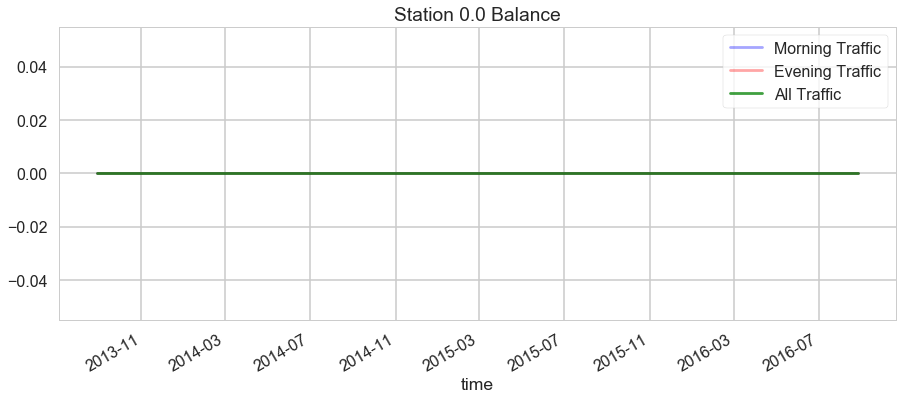

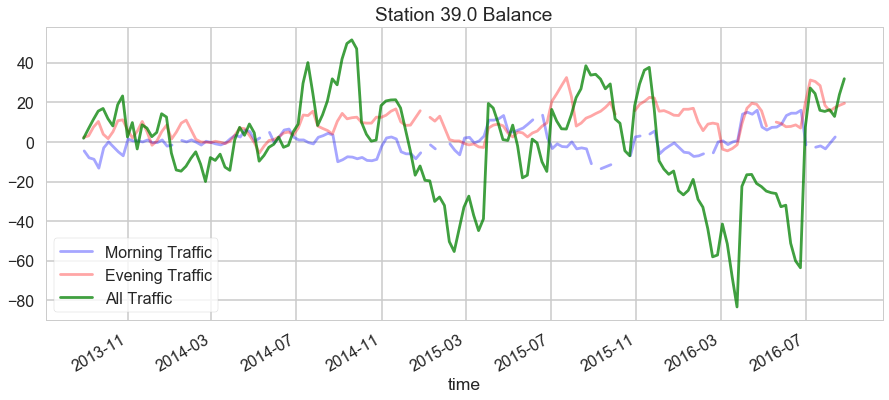

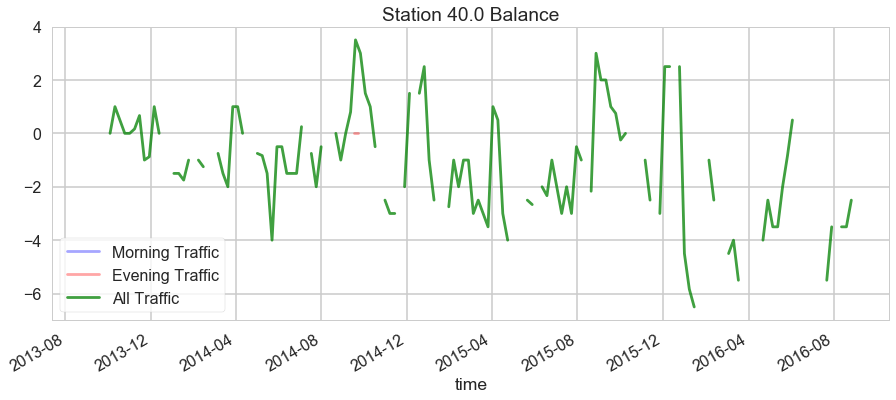

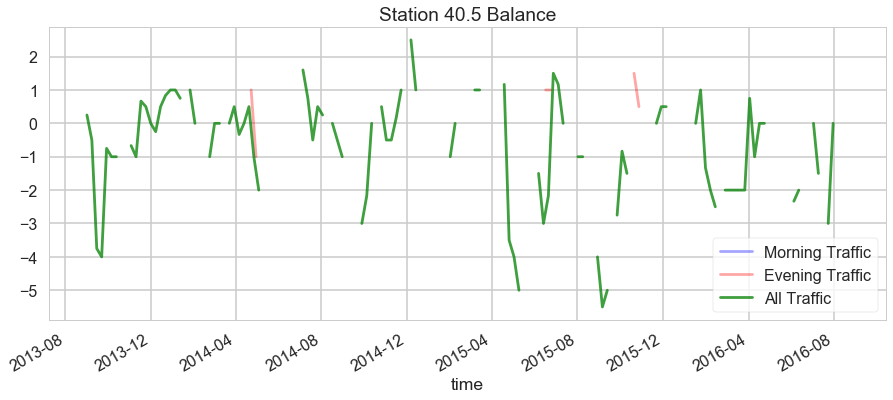

TypeError: Empty 'DataFrame': no numeric data to plot

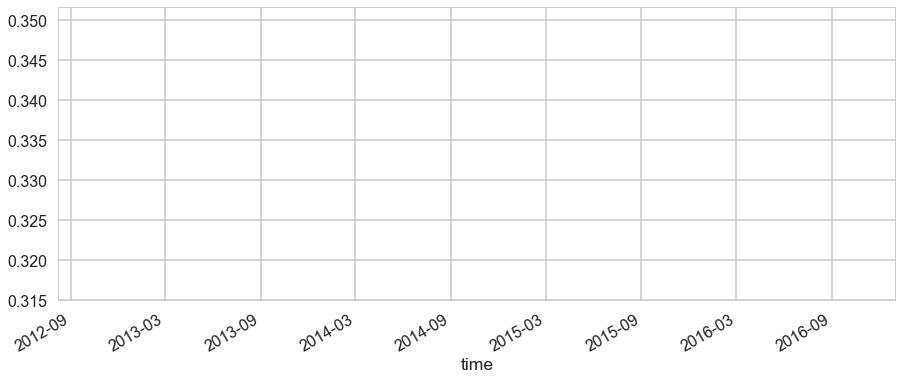

In [16]:
for sid in sorted(sf_traffic.station_id.unique())[:5]:
    
#     data = station_balance[station_balance.station == sid].copy()
    morning_station_data = morning_commuter_traffic[morning_commuter_traffic.station_id == sid].copy()
    evening_station_data = evening_commuter_traffic[evening_commuter_traffic.station_id == sid].copy()
    sf_station_data = sf_traffic[sf_traffic.station_id == sid].copy()
    
    
    ax = morning_station_data.groupby(morning_station_data.index.month).balance.cumsum().resample('7D').mean().plot(figsize=FIG_SIZE, color='b', label='Morning Traffic', linestyle='-', marker='', alpha=0.35)
    evening_station_data.groupby(evening_station_data.index.month).balance.cumsum().resample('7D').mean().plot(ax=ax, color='r', label='Evening Traffic', linestyle='-', marker='', alpha=0.35)
    sf_station_data.groupby(sf_station_data.index.month).balance.cumsum().resample('7D').mean().plot(ax=ax, color='g', label='All Traffic', linestyle='-', marker='', alpha=0.75)
    

    ax.set_title('Station %s Balance' % (sid))
    ax.legend(loc='best', frameon=True)
    plt.show()
    plt.close()

# Plotting Trip Destinations and Originations for Each Station 
<p>Largest Negative Inbalance, where is everyone going?</p>

In [ ]:
def plot_terminal_connections_outbound(df=None, start_term=70, prefix=''):
    
    df = df[df.start_terminal == start_term].copy()
    
    ax = df.groupby(['end_terminal']).count()['trip_id'].plot(kind='bar', figsize=(24,6), color='b', alpha=0.35)
    title = '%s Destinations from Station %s' % (prefix, start_term)
    
    ax.set_xlabel('Destination Station')
    ax.set_ylabel('Number of Trips')
    ax.set_title(title, size=TITLE_FONT_SIZE)
    file_name = '../charts/balancing/connections/outbound_%s' % title.replace(' ', '_')
    plt.savefig(file_name)
    plt.show()

def plot_terminal_connections_inbound(df=None, end_term=70, prefix=''):

    df = df[df.end_terminal == end_term].copy()
    ax = df.groupby(['start_terminal']).count()['trip_id'].plot(kind='bar', figsize=(24,6), color='b', alpha=0.35)
    title = '%s Origins to Station %s' % (prefix, end_term)
    
    ax.set_xlabel('Origin Station')
    ax.set_ylabel('Number of Trips')
    ax.set_title(title, size=TITLE_FONT_SIZE)
    file_name = '../charts/balancing/connections/inbound_%s' % title.replace(' ', '_')
    plt.savefig(file_name)
    plt.show()

In [ ]:
def plot_hourly_inbound_outbound(df=None, terminal=70, suffix='', alpha=0.35):
    
    title = 'Station %s Hourly %s Traffic' % (terminal, suffix)
    title = title.strip()
    
    # count hourly trips to this terminal
    inbound = df[df.end_terminal == terminal]
    inbound_hourly = inbound.groupby(inbound.end_date.dt.hour).count()['trip_id'].to_frame()
    inbound_hourly.columns = ['inbound_hourly']
    
    outbound = df[df.start_terminal == terminal]
    outbound_hourly = outbound.groupby(outbound.start_date.dt.hour).count()['trip_id'].to_frame()
    outbound_hourly.columns = ['outbound_hourly']
    
    hourly_traffic = inbound_hourly.merge(outbound_hourly, left_index=True, right_index=True, how='outer')

    # fill in missing index
    new_index = pd.Index(range(0, 24, 1), name='ID')
    hourly_traffic = hourly_traffic.reindex(new_index)
    hourly_traffic.fillna(0, inplace=True)

    plt.subplots(figsize=(24,6))
    ax = sns.barplot(x=hourly_traffic.index, y=hourly_traffic.inbound_hourly, color='b', alpha=alpha, label='inbound')
    sns.barplot(x=hourly_traffic.index, y=hourly_traffic.outbound_hourly, ax=ax, color='r', alpha=alpha, label='outbound')
    
    plt.title(title, size=TITLE_FONT_SIZE)
    plt.legend(loc=1, frameon=True)
    ax.set_xlabel('Hour', size=LABEL_FONT_SIZE)
    ax.set_ylabel('Total Trips', size=LABEL_FONT_SIZE)
    
    file_name = '../charts/balancing/hourly/%s' % title.replace(' ', '_')
    plt.savefig(file_name)
    
    # be memory effecient, close the figure once we are done with it
    plt.close('all')

In [ ]:
subscriber_trips = trips[trips.user_type == 'Subscriber'].copy()
customer_trips = trips[trips.user_type == 'Customer'].copy()

## Plot Hourly Traffic at each Station

In [ ]:
for terminal in sorted(trips.start_terminal.unique()):
    plot_hourly_inbound_outbound(terminal=terminal, df=subscriber_trips, suffix='Subscribers')
    plot_hourly_inbound_outbound(terminal=terminal, df=subscriber_trips[subscriber_trips.start_date.dt.dayofweek < 5], suffix='Subscribers Weekday')
    plot_hourly_inbound_outbound(terminal=terminal, df=subscriber_trips[subscriber_trips.start_date.dt.dayofweek >= 5], suffix='Subscribers Weekend')
    plot_hourly_inbound_outbound(terminal=terminal, df=customer_trips, suffix='Customers')

# Weekly Traffic Patterns

In [ ]:
def plot_weekly_inbound_outbound(df=None, terminals=[70], suffix='', title='', alpha=0.35):
    if title == '':
        terminal_titles = ' '.join([str(x) for x in terminals])
        title = 'Station %s Weekly %s Traffic' % (terminal_titles, suffix)
        title = title.replace('  ', ' ').replace("'", '')
        title = title.strip()
    else:
        title = title
        
    #--------------------------------------------------------------------------------
    #   count weekly and hourly trips at specified terminal
    #--------------------------------------------------------------------------------
#     inbound = df[df.end_terminal == terminal]
    inbound = df[df.end_terminal.isin(terminals)]
    inbound_hourly = inbound.groupby([inbound.end_date.dt.dayofweek, inbound.end_date.dt.hour]).count()['trip_id'].to_frame()
    inbound_hourly.columns = ['inbound_hourly']
    inbound_hourly.index.names = ['dayofweek', 'hour']

#     outbound = df[df.start_terminal == terminal]
    outbound = df[df.start_terminal.isin(terminals)]
    outbound_hourly = outbound.groupby([outbound.start_date.dt.dayofweek, outbound.start_date.dt.hour]).count()['trip_id'].to_frame()
    outbound_hourly.columns = ['outbound_hourly']
    outbound_hourly.index.names = ['dayofweek', 'hour']
    
    hourly_influx = inbound_hourly.merge(outbound_hourly, left_index=True, right_index=True, how='outer')
    hourly_influx.reset_index(inplace=True)
    
    hourly_influx['ID'] = (hourly_influx.dayofweek * 24) + hourly_influx.hour
    weekly_traffic = hourly_influx.copy()
    
    # fill in missing index
    new_index = pd.Index(range(0, 24*7, 1), name='ID')
    weekly_traffic = weekly_traffic.set_index('ID').reindex(new_index)
    weekly_traffic.fillna(0, inplace=True)

    
    #--------------------------------------------------------------------------------
    #   plotting
    #--------------------------------------------------------------------------------
    plt.subplots(figsize=(24,6))
    ax = sns.barplot(x=weekly_traffic.index, y=weekly_traffic.inbound_hourly, color='b', alpha=alpha, label='inbound')
    sns.barplot(x=weekly_traffic.index, y=weekly_traffic.outbound_hourly, ax=ax, color='r', alpha=alpha, label='outbound')
    
    plt.title(title, size=TITLE_FONT_SIZE)
    plt.legend(loc=1, frameon=True)
    
    ax.set_xticks([x*24+13 for x in range(0, 7, 1)])
    ax.set_xticklabels(day_labels_full)
    for vline in [x*24 for x in range(1, 7, 1)]:
        ax.axvline(x=vline, linestyle=':', color='k', alpha=0.5)
    ax.set_xlabel('Hour', size=LABEL_FONT_SIZE)
    ax.set_ylabel('Total Trips', size=LABEL_FONT_SIZE)
#     plt.show()
    file_name = '../charts/balancing/weekly/%s' % title.replace(' ', '_')
    plt.savefig(file_name)
    
    # be memory effecient, close the figure once we are done with it
    plt.close('all')
    print('Finished %s' % title)

## Plot Weekly Traffic at each Station

In [ ]:
for terminal in sorted(trips.start_terminal.unique()):
    plot_weekly_inbound_outbound(terminals=[terminal], df=trips, suffix='', title='')

## Plot Hourly Traffic at Caltrain 'Super Station'
<p>Stations 69 and 70 are across the street from each other and the most popular stations in the program</p>
<p>Plot weekly traffic as if they were a sigle station</p>

In [ ]:
plot_weekly_inbound_outbound(terminals=[69, 70], df=trips, suffix='', title='Caltrain \'Super Station\' Weekly Traffic')

In [ ]:

plot_terminal_connections_outbound(df=subscriber_trips, start_term=56, prefix='Subscriber')
plot_terminal_connections_outbound(df=customer_trips, start_term=56, prefix='Customer')

In [ ]:
plot_terminal_connections_inbound(df=subscriber_trips, end_term=56, prefix='Subscriber')

# MOST POPULAR INBOUND ROUTES FOR EACH STATION

In [ ]:
for eid in sorted(subscriber_trips.end_terminal.unique()):
    
    plot_terminal_connections_inbound(df=subscriber_trips, end_term=eid, prefix='Subscriber')

# MOST POPULAR OUTBOUND ROUTES FOR EACH STATION

In [ ]:
for sid in sorted(subscriber_trips.start_terminal.unique()):
    
    plot_terminal_connections_outbound(df=subscriber_trips, start_term=sid, prefix='Subscriber')

## Status Data

In [ ]:
print('[%s] Loading Status Data...' % datetime.datetime.now().time())

status_df = pd.DataFrame()
data_file = '../clean_data/bayareabikeshare/status_data_cleaned.csv'

# Chunk Settings
chunks = []
chunk_counter = 1
chunksize = 10000
num_chunks = math.ceil(sum(1 for row in open(data_file, 'r'))/chunksize)

# import file in chunks
for chunk in pd.read_csv(data_file, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['time']):
    
    # prune chunks
    chunk = chunk[chunk.station_id.isin(pop_commuter_stations)]
    
    # append chunk to chunks list
    chunks.append(chunk)

    if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
        print('\t\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
    chunk_counter += 1

status_df = pd.concat(chunks)
# trips_df.user_type = trips_df.user_type.astype('category')

status_df.drop_duplicates(inplace=True)
status_df.dock_count = status_df.dock_count.astype('int')
status_df.zip_code   = status_df.zip_code.astype('int')

status_df.reset_index(inplace=True, drop=True)

print('[%s] Complete!' % datetime.datetime.now().time())

In [ ]:
status_df.info()

In [ ]:
status_df.head(3)

In [ ]:
s70_status = status_df[status_df.station_id == 70].copy()

s70_status.sort_values('time', inplace=True)
s70_status.reset_index(inplace=True, drop=True)
s70_status.set_index('time', inplace=True)


s70_status['bike_avail_diff'] = s70_status.bikes_available - s70_status.bikes_available.shift(1)
s70_status.fillna(0, inplace=True)

s70_status.head(20)

In [ ]:
ax = s70_status.groupby([s70_status.index.dayofyear]).max().bike_avail_diff.plot(figsize=(24,6), color='b', label='Max Difference')
s70_status.groupby([s70_status.index.dayofyear]).min().bike_avail_diff.plot(ax=ax, color='r', label='Min Difference')
s70_status.groupby([s70_status.index.dayofyear]).mean().bike_avail_diff.plot(ax=ax, color='g', label='Mean Difference')
s70_status.groupby([s70_status.index.dayofyear]).median().bike_avail_diff.plot(ax=ax, color='c', label='Median Difference')

ax.set_title('Change in Reported Number of Available Bikes')
ax.legend(loc=2, frameon=True)
plt.show()

In [ ]:
ax = s70_status.groupby([s70_status.index.date]).max().bike_avail_diff.plot(figsize=(24,6), color='b', label='Max Difference')
s70_status.groupby([s70_status.index.date]).min().bike_avail_diff.plot(ax=ax, color='r', label='Min Difference')

ax.set_title('Change in Reported Number of Available Bikes')
ax.legend(loc=2, frameon=True)
plt.show()

In [ ]:
s70_balance = station_balance[station_balance.terminal == 70].copy()
s70_balance.head(3)

In [ ]:
s70_status.head(3)

In [ ]:
s70_status_diff = s70_status[['bike_avail_diff']].copy()
s70_status_diff.reset_index(inplace=True)
s70_status_diff.head()

In [ ]:
s70_trip_diff = s70_balance[['time', 'balance']].copy()
s70_trip_diff.reset_index(inplace=True, drop=True)
s70_trip_diff.fillna(0, inplace=True)
s70_trip_diff.head()

In [ ]:
s70_merge = s70_status_diff.merge(s70_trip_diff, left_on='time', right_on='time', how='left')
s70_merge.fillna(0, inplace=True)

s70_merge.columns = ['time', 'status_diff', 'trip_diff']
s70_merge.drop_duplicates(inplace=True)
s70_merge.set_index('time', inplace=True)

s70_merge['ALT'] = s70_merge.status_diff - s70_merge.trip_diff.shift(1)

s70_merge.head(30)

In [ ]:
s70_merge.groupby([s70_merge.index.dayofweek, s70_merge.index.hour]).sum().ALT.plot(kind='bar', figsize=(36,6))
plt.title('Number of Trips Arriving - Reported Increase in Available Bikes')
plt.show()